In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [4]:
def copynumber(conc, volume, um = True):
    if um == True:
        volume = volume/1e15
        conc = conc/1e6
        
        moles = conc * volume
        copies = moles * 6.023e23
        
        return copies
    elif um == False:
        volume = volume/1e15
        moles = conc / volume
        rate = moles / 6.023e23

        return rate


In [5]:
##converts to copies/s
##multiply by 10^6, then divide by volume in nm^3

def rate_converter(conc,V):
    conc1 = conc/0.602214076 ## convert from uM-1 s-1 to nm^3/us
    conc2 = conc1 * 1e6 ##convert to seconds from microseconds
    nanoV = V *1e9 ##convert volume from um3 to nm3
    return conc2/nanoV ##divide by volume to get copies per second

# Time Series Plot

[0.3791999300713553, 700.8240393636927, 2.346311110198, 0.05, 100, 0.1, 700, 0.3791999300713553, 700.8240393636927, 2.346311110198, 0.3, 200, 1, 0.1, 300, 0.3, 200, 1, 750]
[723, 0, 337, 0, 500, 0, 0, 0, 400, 0, 0, 0]


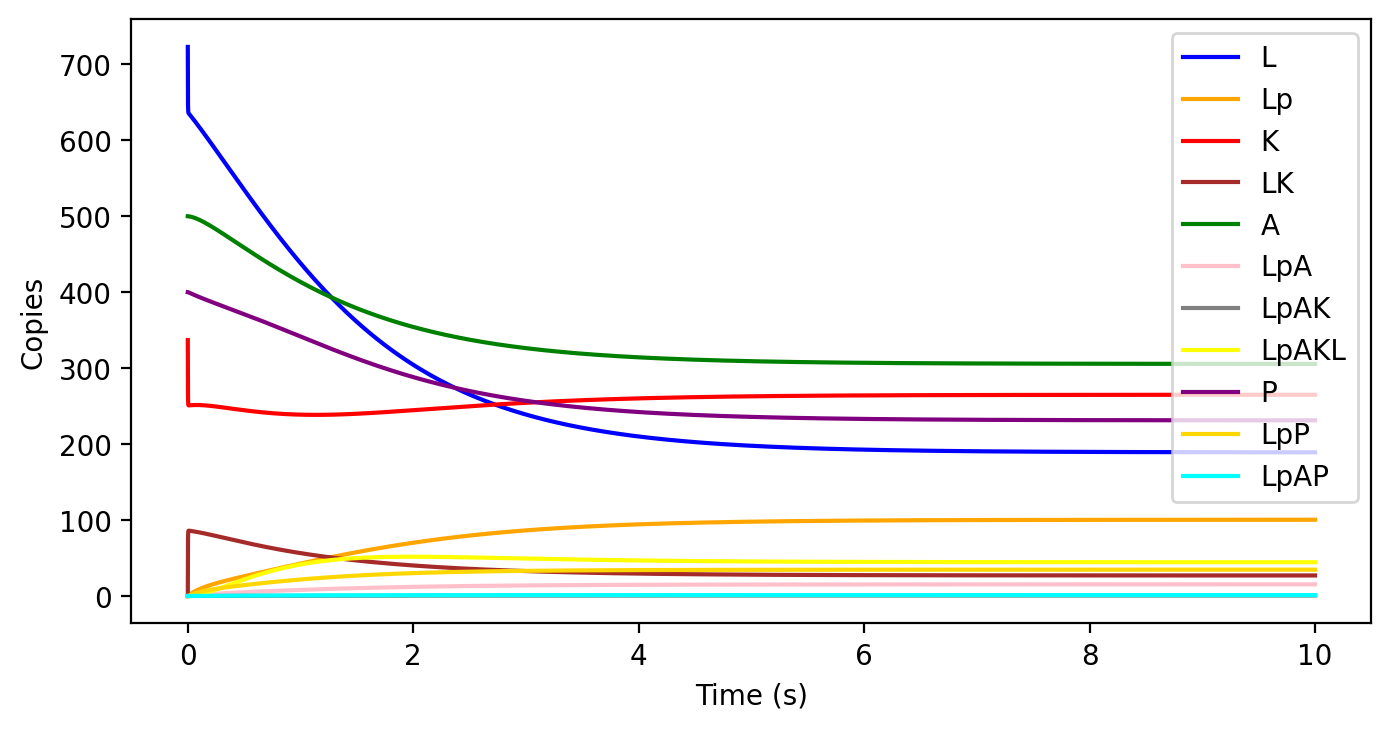

In [40]:
##'ka1': 0.06296910163921543, 'kb1': 97.82403936369272, 'kcat1': 277.346311110198,
# 'ka2': 0.7163743434133126, 'kb2': 32.47470589751822, 'ka3': 7.559407489840667, 'kb3': 223.36133248956713, 
# 'ka4': 0.8199153260341503, 'kb4': 1.8864353860273186, 'ka7': 0.9946959796263228, 'kb7': 90.04601085463732, 
# 'kcat7': 70.73363511534804, 'V': 0.07994067550020652, 'VA': 1.5, 'sigma': 0.001, 'L': 87.30083542079618, 
# 'Lp': 0.0, 'K': 7.111613238604031, 'P': 5.451528942232038, 'LK': 0.0, 'A': 10, 'LpA': 0.0, 'LpAK': 0.0, 
# 'LpAP': 0.0, 'LpAPLp': 0.0, 'LpAKL': 0.0, 'LpP': 0.0


# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,10,num=10000)

y = 750

ka1 = 0.3791999300713553
kb1 = 700.82403936369272
kcat1 = 2.346311110198

ka2 = 0.05 
kb2 = 100

ka3 = 0.1
kb3 = 700

ka4 = ka1
kb4 = kb1
kcat4 = kcat1

ka5 = 0.3
kb5 = 200
kcat5 = 1

ka6 = 0.1
kb6 = 300

ka7 = ka5
kb7 = kb5
kcat7 = kcat5


params = [ka1, kb1, kcat1, ka2, kb2, ka3, kb3, ka4, kb4, kcat4, ka5, kb5, kcat5, ka6, kb6, ka7, kb7, kcat7, y]

L = 723
Lp = 0
K = 337
LK = 0
A = 500
LpA = 0
LpAK = 0
LpAKL = 0
P = 400
LpP = 0
LpAP = 0
LpAPLp = 0


initial_populations = [L,0,K,0,A,0,0,0,P,LpP,LpAP,LpAPLp]



def calculate_current_population_change_rates(t, current_counts, params):

    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    LK = current_counts[3]
    A = current_counts[4]
    LpA = current_counts[5]
    LpAK = current_counts[6]
    LpAKL = current_counts[7]
    P = current_counts[8]
    LpP = current_counts[9]
    LpAP = current_counts[10]
    LpAPLp = current_counts[11]
   

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]

    ka3 = params[5]
    kb3 = params[6]

    ka4 = params[7]
    kb4 = params[8]
    kcat4 = params[9]

    ka5 = params[10]
    kb5 = params[11]
    kcat5 = params[12]

    ka6 = params[13]
    kb6 = params[14]

    ka7 = params[15]
    kb7 = params[16]
    kcat7 = params[17]

    y = params[18]


    dL = (kb1*LK) - (ka1*L*K) + (kb4*LpAKL) - (y*ka4*LpAK*L) + (kcat5*LpP) + (kcat7*LpAPLp)
    dLp = (kcat1*LK) - (ka2*Lp*A) + (kb2*LpA) + (kcat4*LpAKL) + (kb5*LpP) - (ka5*Lp*P) - (y*ka7*Lp*LpAP) + (kb7*LpAPLp)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) - (ka3*LpA*K) + (kb3*LpAK)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dA = (kb2*LpA) - (ka2*Lp*A)
    dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K) - (ka6*LpA*P) + (kb6*LpAP)
    dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb4*LpAKL) - (y*ka4*LpAK*L) + (kcat4*LpAKL)
    dLpAKL = (y*ka4*LpAK*L) - (kb4*LpAKL) - (kcat4*LpAKL)
    dP = (kb5*LpP) + (kcat5*LpP) - (Lp*P*ka5) - (ka6*LpA*P) + (kb6*LpAP)
    dLpP = (ka5*Lp*P) - (kb5*LpP) - (kcat5*LpP)
    dLpAP = (ka6*LpA*P) - (kb6*LpAP) - (y*ka7*Lp*LpAP) + (kb7*LpAPLp) + (kcat7*LpAPLp)
    dLpAPLp = (y*ka7*Lp*LpAP) - (kb7*LpAPLp) - (kcat7*LpAPLp)


    return([dL, dLp, dK, dLK, dA, dLpA, dLpAK, dLpAKL, dP, dLpP, dLpAP, dLpAPLp])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
#solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

solutions = solve_ivp(fun=calculate_current_population_change_rates,method='BDF', t_span=(0, 100), 
            y0=initial_populations, t_eval=t, args=(params,),rtol=1e-6, atol=1e-9)


#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

#plt.plot(t,solutions[:,0], color="b", label = 'L')
#plt.plot(t,solutions[:,1], color="orange", label = 'Lp')
#plt.plot(t,solutions[:,2], color="r", label = 'K')
#plt.plot(t,solutions[:,3], color="brown", label = 'LK')
#plt.plot(t,solutions[:,4], color="g", label = 'A')
#plt.plot(t,solutions[:,5], color="pink", label = 'LpA')
#plt.plot(t,solutions[:,6], color="grey", label = 'LpAK')
##plt.plot(t,solutions[:,7], color="yellow", label = 'LpAKL')
#plt.plot(t,solutions[:,8], color="purple", label = 'P')
#plt.plot(t,solutions[:,9], color="gold", label = 'LpP')
#plt.plot(t,solutions[:,10], color="cyan", label = 'LpAP')

plt.plot(t,solutions.y[0,:], color="b", label = 'L')
plt.plot(t,solutions.y[1,:], color="orange", label = 'Lp')
plt.plot(t,solutions.y[2,:], color="r", label = 'K')
plt.plot(t,solutions.y[3,:], color="brown", label = 'LK')
plt.plot(t,solutions.y[4,:], color="g", label = 'A')
plt.plot(t,solutions.y[5,:], color="pink", label = 'LpA')
plt.plot(t,solutions.y[6,:], color="grey", label = 'LpAK')
plt.plot(t,solutions.y[7,:], color="yellow", label = 'LpAKL')
plt.plot(t,solutions.y[8,:], color="purple", label = 'P')
plt.plot(t,solutions.y[9,:], color="gold", label = 'LpP')
plt.plot(t,solutions.y[10,:], color="cyan", label = 'LpAP')

plt.xlabel('Time (s)')
plt.ylabel('Copies')
plt.legend()

print(params)
print(initial_populations)
plt.show()



In [42]:
solutions.y[9,:]

array([0.00000000e+00, 3.08336516e-03, 1.81987199e-02, ...,
       3.46566506e+01, 3.46566528e+01, 3.46566550e+01])

## SolveIVP

[0.0007866872786655376, 700.8240393636927, 200.346311110198, 0.0010372988182217016, 100, 0.0020745976364434033, 700, 0.0007866872786655376, 700.8240393636927, 200.346311110198, 750.0]
[723.13493175, 0, 337.46296815, 0, 482.0899545000001, 0, 0, 0]


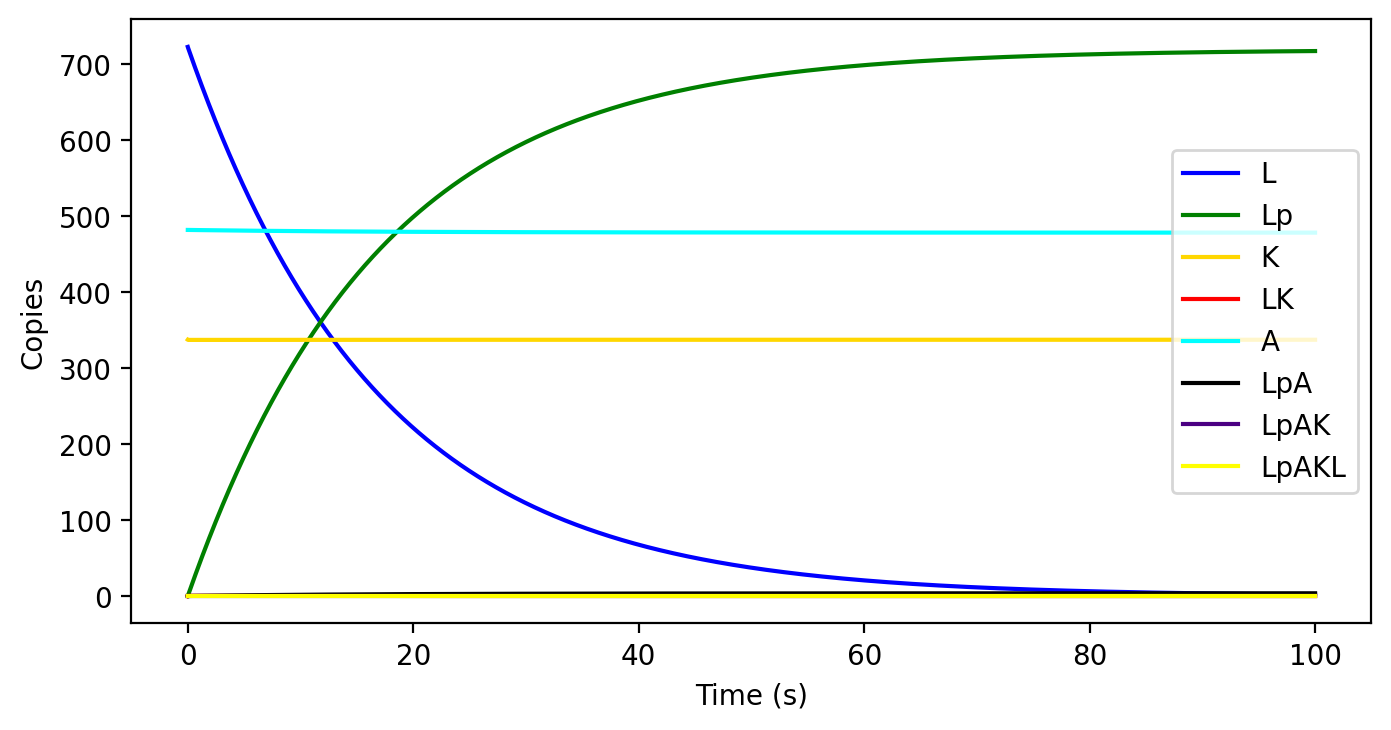

In [7]:
##'ka1': 0.06296910163921543, 'kb1': 97.82403936369272, 'kcat1': 277.346311110198,
# 'ka2': 0.7163743434133126, 'kb2': 32.47470589751822, 'ka3': 7.559407489840667, 'kb3': 223.36133248956713, 
# 'ka4': 0.8199153260341503, 'kb4': 1.8864353860273186, 'ka7': 0.9946959796263228, 'kb7': 90.04601085463732, 
# 'kcat7': 70.73363511534804, 'V': 0.07994067550020652, 'VA': 1.5, 'sigma': 0.001, 'L': 87.30083542079618, 
# 'Lp': 0.0, 'K': 7.111613238604031, 'P': 5.451528942232038, 'LK': 0.0, 'A': 10, 'LpA': 0.0, 'LpAK': 0.0, 
# 'LpAP': 0.0, 'LpAPLp': 0.0, 'LpAKL': 0.0, 'LpP': 0.0


# Create a timeline from 0 to 50 divided into a thousand steps
t = np.linspace(0,100,num=10000)

V = 0.0800415
VA = 1.5
sigma = 0.001
y = VA/(2*sigma)

ka1 = 0.03791999300713553
kb1 = 700.82403936369272
kcat1 = 200.346311110198

ka2 = 0.05 
kb2 = 100

ka3 = 0.1
kb3 = 700

ka4 = ka1
kb4 = kb1
kcat4 = kcat1


params = [rate_converter(ka1,V), kb1, kcat1, rate_converter(ka2,V), kb2, rate_converter(ka3,V),
             kb3, rate_converter(ka4,V), kb4, kcat4, y]

L = 15
Lp = 0
K = 7
LK = 0
A = 10
LpA = 0
LpAK = 0
LpAKL = 0


initial_populations = [copynumber(L,V),0,copynumber(K,V),0,copynumber(A,V),0,0,0]



def calculate_current_population_change_rates(t, current_counts, params):

    L = current_counts[0] 
    Lp = current_counts[1]
    K = current_counts[2]
    LK = current_counts[3]
    A = current_counts[4]
    LpA = current_counts[5]
    LpAK = current_counts[6]
    LpAKL = current_counts[7]
   

    ka1 = params[0]
    kb1 = params[1]
    kcat1 = params[2]

    ka2 = params[3]
    kb2 = params[4]

    ka3 = params[5]
    kb3 = params[6]

    ka4 = params[7]
    kb4 = params[8]
    kcat4 = params[9]


    dL = (kb1*LK) - (ka1*L*K) + (kb4*LpAKL) - (y*ka4*LpAK*L)
    dLp = (kcat1*LK) - (ka2*Lp*A) + (kb2*LpA) + (kcat4*LpAKL)
    dK = (kb1*LK) - (ka1*L*K) + (kcat1*LK) - (ka3*LpA*K) + (kb3*LpAK)
    dLK = (ka1*L*K) - (kb1*LK) - (kcat1*LK)
    dA = (kb2*LpA) - (ka2*Lp*A)
    dLpA = (ka2*Lp*A) - (kb2*LpA) + (kb3*LpAK) - (ka3*LpA*K)
    dLpAK = (ka3*LpA*K) - (kb3*LpAK) + (kb4*LpAKL) - (y*ka4*LpAK*L) + (kcat4*LpAKL)
    dLpAKL = (y*ka4*LpAK*L) - (kb4*LpAKL) - (kcat4*LpAKL)


    return([dL, dLp, dK, dLK, dA, dLpA, dLpAK, dLpAKL])	

# Repeatedly calls 'calculate_current_population_change_rates' for every time step and solves numerically to get the population numbers
#solutions = odeint(calculate_current_population_change_rates, initial_populations, t, args=(params,))

solutions = solve_ivp(fun=calculate_current_population_change_rates,method='BDF', t_span=(0, 100), 
            y0=initial_populations, t_eval=t, args=(params,),rtol=1e-6, atol=1e-9)


#Plot the two population counts over time
#########################################
fig = plt.figure(figsize=(8,4),dpi=200)

plt.plot(t,solutions.y[0,:], color="b", label = 'L')
plt.plot(t,solutions.y[1,:], color="g", label = 'Lp')
plt.plot(t,solutions.y[2,:], color="gold", label = 'K')
plt.plot(t,solutions.y[3,:], color="r", label = 'LK')
plt.plot(t,solutions.y[4,:], color="cyan", label = 'A')
plt.plot(t,solutions.y[5,:], color="black", label = 'LpA')
plt.plot(t,solutions.y[6,:], color="indigo", label = 'LpAK')
plt.plot(t,solutions.y[7,:], color="yellow", label = 'LpAKL')

plt.xlabel('Time (s)')
plt.ylabel('Copies')
plt.legend()

print(params)
print(initial_populations)
plt.show()



In [32]:
parameter_values = {  "ka1": {"min": 1000/1e6, "max": 1e6/1e6},  
            "kb1": {"min": 0, "max": 100},             				        
            "kcat1": {"min": 0, "max": 500},         
            "ka2": {"min": 1000/1e6, "max": 1e6/1e6},         
            "kb2": {"min": 0, "max": 1000}, 
            "ka3": {"min": 1e3/1e6, "max":1e8/1e6}, 
            "kb3": {"min": 0, "max":500},
            "ka4": {"min": 1e3/1e6, "max":1e6/1e6},
            "kb4": {"min": 0, "max": 100},  
            "ka5": {"min": 1e3/1e6, "max": 1e6/1e6}, 
            "kb5": {"min": 0, "max": 1000}, 
            "kcat5": {"min": 0, "max": 200},
            "V": {"min": 2600, "max": 2600},
            "VA": {"min": 0.5, "max": 2},
            "sigma": {"min": 0.001, "max": 0.001},
            "L": {"min": 1, "max": 1e2},  
            "Lp": {"min": 0, "max": 0}, 
            "K": {"min": 0.01, "max": 0.1},
            "P": {"min": 0.01, "max": 0.1},
            "LK": {"min": 0, "max": 0}, 
            "A": {"min": .1, "max": 10}, 
            "LpA": {"min": 0, "max": 0},
            "LpAK": {"min": 0, "max": 0}, 
            "LpAP": {"min": 0, "max": 0}, 	
            "LpAPLp": {"min": 0, "max": 0},
            "LpAKL": {"min": 0, "max": 0},
            "LpP": {"min": 0, "max": 0},
            }   	

filename =  os.path.join(".", "SIMPLE2_oscillatorCostTwo")  
print(filename)   
model = Oscillator(parameter_values, np.array(["ka1", "kb1", "kcat1", "ka2", "kb2", "ka3", "kb3", "ka4","kb4","ka5","kb5","kcat5","V","VA","sigma","L","Lp","K","P","LK","A","LpA","LpAK","LpAP","LpAPLp","LpAKL","LpP"]), np.array(["L","Lp","K","P",0,"A",0,0,0,0,0,0]), mode=1)  
#solver = Solver(model)         
#solver.run(filename) 

./SIMPLE2_oscillatorCostTwo
